# Predicting the Likelihood of E-Signing a Loan Based on Financial History

- Lending companies work by analyzing the financial history of their loan applicant and to choose whether or not the applicant      is too risky to be given a loan.
- If the applicant is not, the company then determine the term loan.
- Lending companies work on P2P marketplace.
- Where the companies target is to select the target applicant which has greater chance of repayment.


### Importing the library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv('financial_data.csv')

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
#checking whether any NAN value is present or not
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [5]:
#removing the some columns that useless
dataset2 = dataset.drop(columns= ['entry_id', 'pay_schedule', 'e_signed'])

### Visualise  the dataset

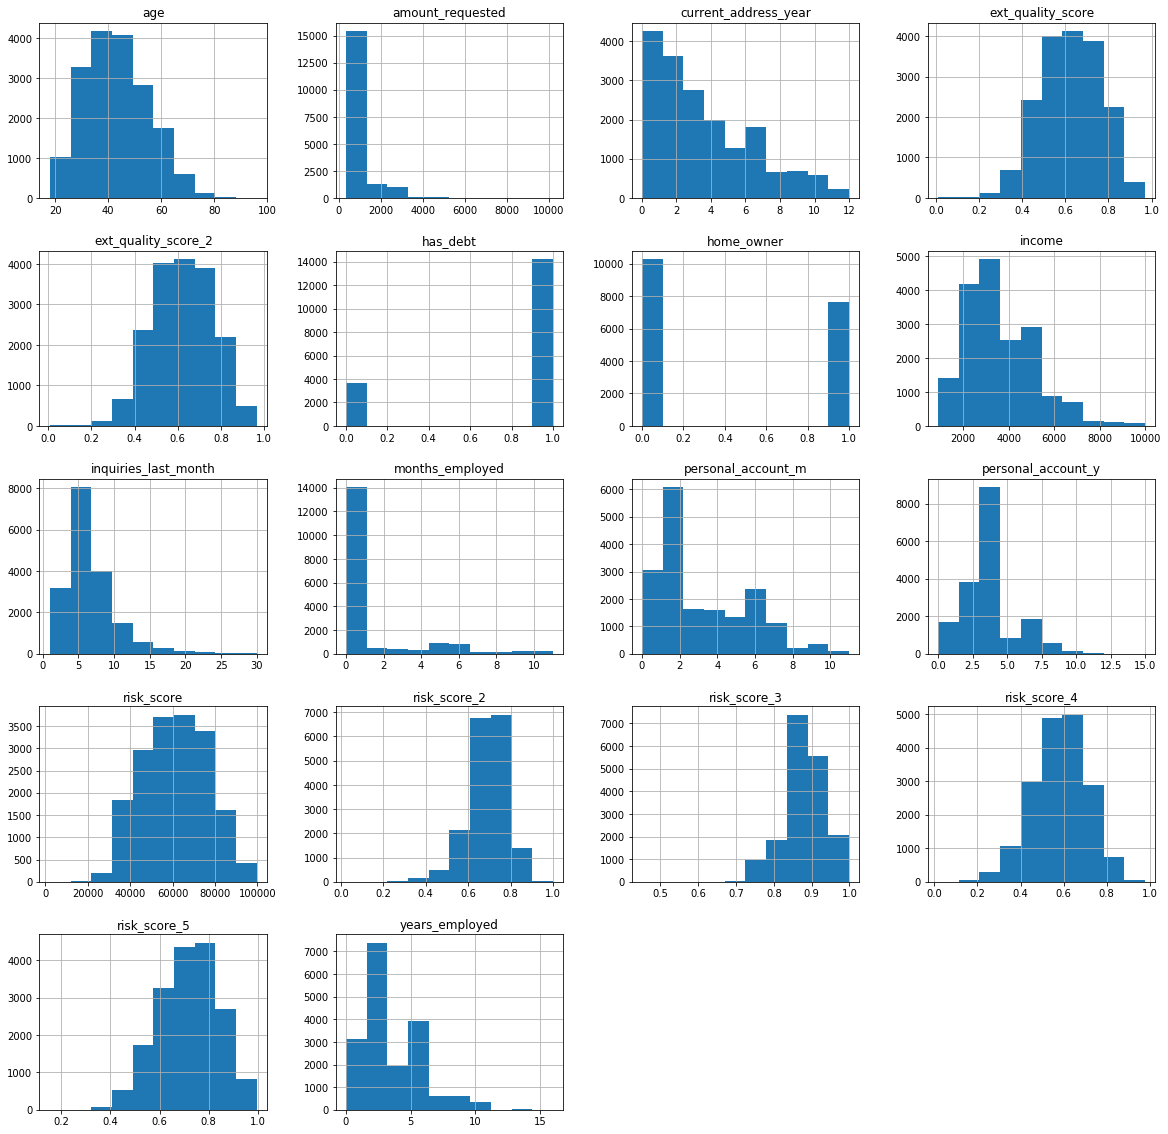

In [6]:
# Plot histograms of each parameter 
dataset2.hist(figsize = (20, 20))
plt.show()

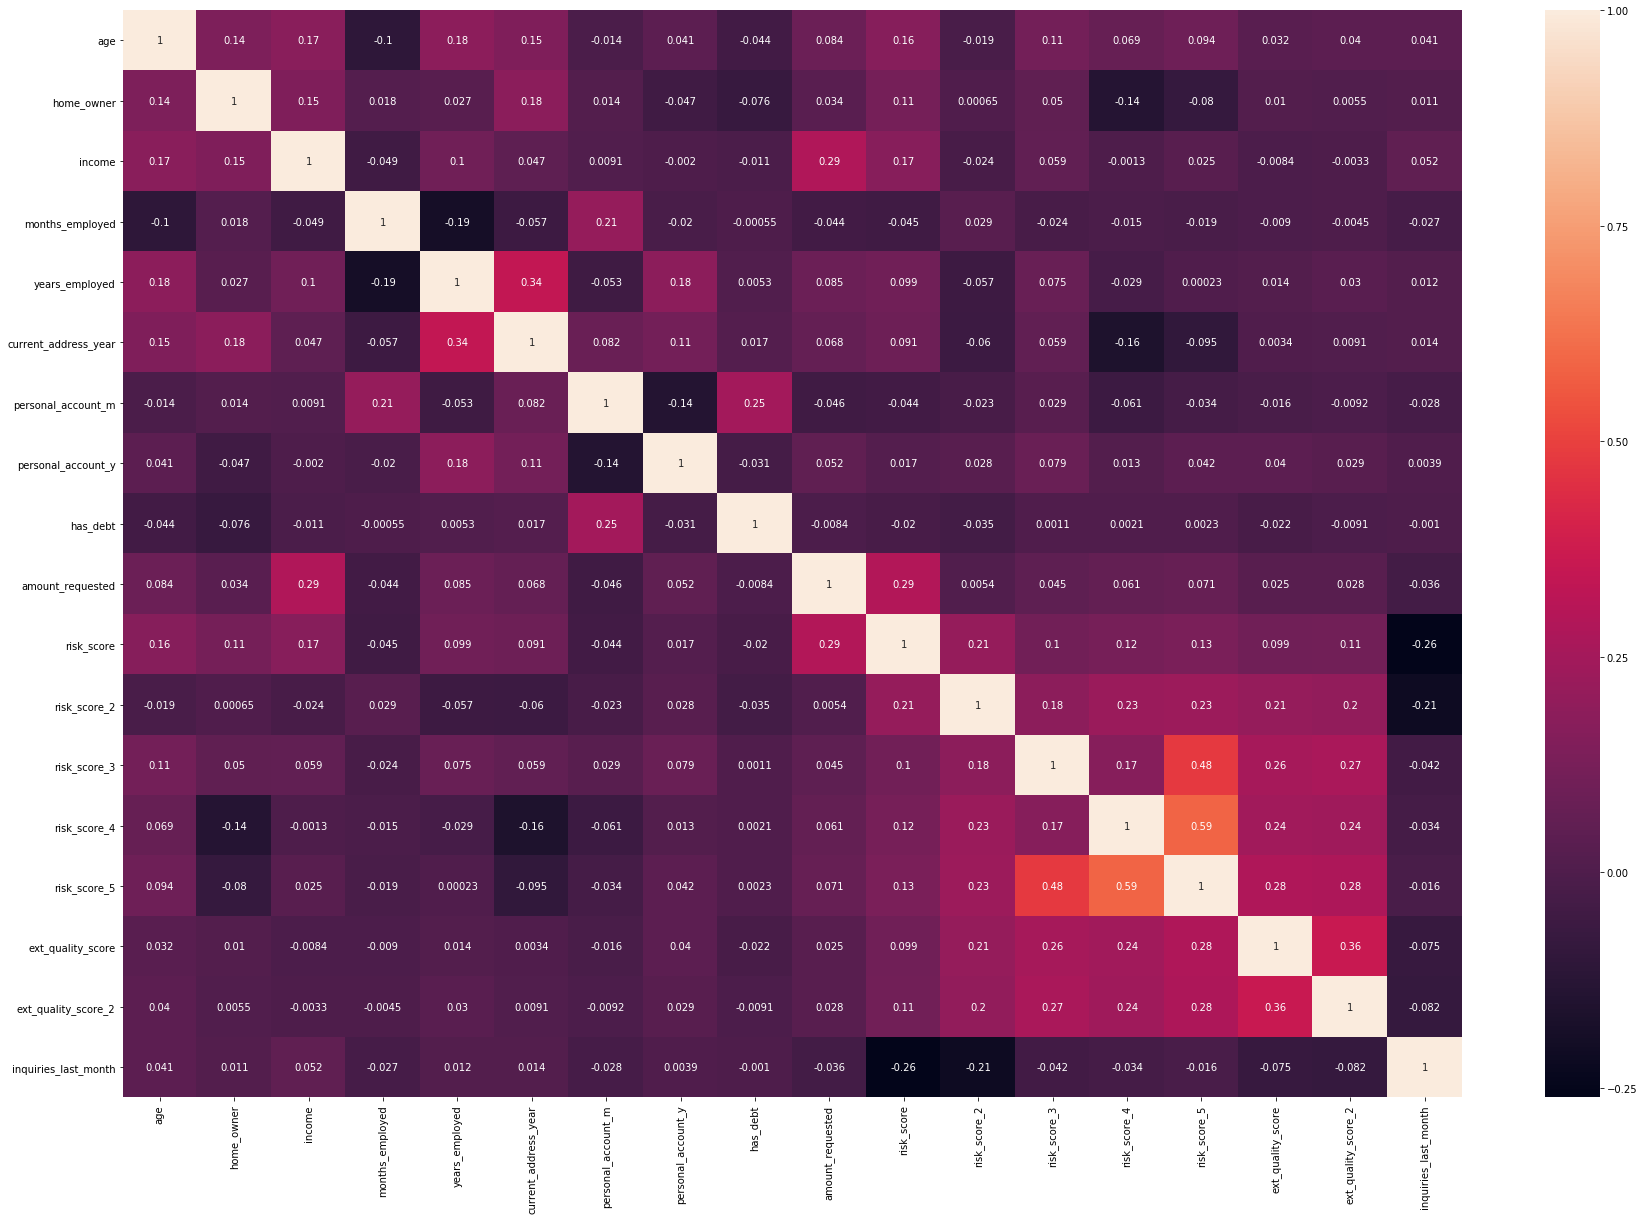

In [7]:
#finding the corellation
plt.figure(figsize=(30,20)) 
sns.heatmap(dataset2.corr(), annot=True) 

### Applying the FeatureEngineering

In [8]:
dataset = dataset.drop(columns= ['months_employed'])

In [9]:
#combining the personal_account detail of month and year
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))

In [10]:
dataset[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [11]:
dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y'])

### Applying the OneHotncoding

In [12]:
dataset = pd.get_dummies(dataset)

In [13]:
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [14]:
dataset = dataset.drop(columns= ['pay_schedule_semi-monthly'])

In [15]:
user_id = dataset['entry_id']
Y = dataset['e_signed']
X = dataset.drop(columns= ['e_signed', 'entry_id'])

### Spliting the dataset 

In [16]:
from sklearn.model_selection import  train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 12345)

### Applying the Feature scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [18]:
X_train = sc.fit_transform(X_train)

In [19]:
X_train

array([[ 1.68634006,  1.16995003,  0.2857685 , ...,  0.81657257,
        -0.29630155, -0.51193242],
       [-1.17717605, -0.85473736, -0.58763843, ...,  0.81657257,
        -0.29630155, -0.51193242],
       [ 0.08613988, -0.85473736, -0.05092654, ..., -1.22463089,
         3.37494021, -0.51193242],
       ...,
       [-0.33496543, -0.85473736, -0.6976477 , ...,  0.81657257,
        -0.29630155, -0.51193242],
       [-0.58762862, -0.85473736, -0.65764433, ..., -1.22463089,
         3.37494021, -0.51193242],
       [-1.5140603 ,  1.16995003, -1.07434612, ..., -1.22463089,
        -0.29630155, -0.51193242]])

In [20]:
X_test = sc.transform(X_test)

### Applying the Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
Y_pred = classifier.predict(X_test)

In [23]:
Y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [25]:
cm = confusion_matrix(Y_test, Y_pred)

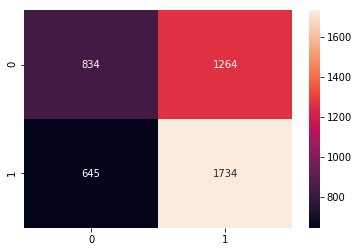

In [26]:
sns.heatmap(cm, annot = True, fmt = 'g')

In [27]:
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.56      0.40      0.47      2098
          1       0.58      0.73      0.64      2379

avg / total       0.57      0.57      0.56      4477



In [28]:
accuracy_score(Y_test, Y_pred)

0.57359839178021

### Applying the SVM to the model

In [29]:
from sklearn.svm import SVC
classifier_svm_lin = SVC(random_state = 0, kernel ='linear' )
classifier_svm_lin.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
Y_pred_svm_lin = classifier_svm_lin.predict(X_test)

In [31]:
Y_pred_svm_lin

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [32]:
cm_svm_lin = confusion_matrix(Y_test, Y_pred_svm_lin)

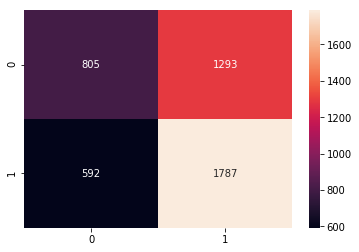

In [33]:
sns.heatmap(cm_svm_lin, annot = True, fmt ='g')

In [34]:
accuracy_score(Y_test, Y_pred_svm_lin)

0.5789591244136699

#### Analyse the SVM by rbf kernel

In [35]:
classifier_svm_rbf = SVC(random_state = 0, kernel='rbf')
classifier_svm_rbf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
Y_pred_svm_rbf = classifier_svm_rbf.predict(X_test)

In [37]:
Y_pred_svm_rbf

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [38]:
cm_svm_rbf = confusion_matrix(Y_test, Y_pred_svm_rbf)

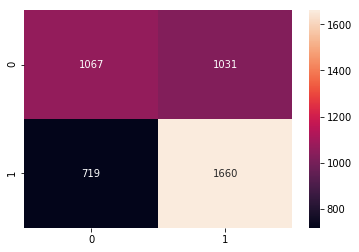

In [39]:
sns.heatmap(cm_svm_rbf, annot =True, fmt = 'g')

In [40]:
accuracy_score(Y_test, Y_pred_svm_rbf)

0.6091132454768818

In [41]:
print(classification_report(Y_test, Y_pred_svm_rbf))

             precision    recall  f1-score   support

          0       0.60      0.51      0.55      2098
          1       0.62      0.70      0.65      2379

avg / total       0.61      0.61      0.61      4477



### Applying the Naive_Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

GaussianNB(priors=None)

In [43]:
Y_pred_nb = classifier_nb.predict(X_test)

In [44]:
Y_pred_nb

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [45]:
cm_nb = confusion_matrix(Y_test, Y_pred_nb)

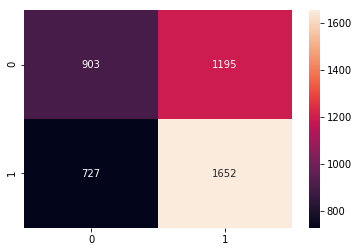

In [46]:
sns.heatmap(cm_nb, annot= True, fmt = 'g')

In [47]:
accuracy_score(Y_test, Y_pred_nb)

0.5706946616037525

### Applying RandomForest

In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier_ranfor = RandomForestClassifier(n_estimators = 100, criterion ='entropy', random_state = 0)
classifier_ranfor.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [49]:
Y_pred_ranfor = classifier_ranfor.predict(X_test)

In [50]:
Y_pred_ranfor

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [51]:
cm_ranfor =confusion_matrix(Y_test, Y_pred_ranfor)

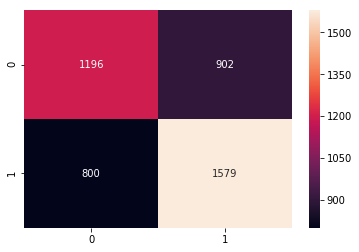

In [52]:
sns.heatmap(cm_ranfor, annot = True, fmt = 'g')

In [53]:
accuracy_score(Y_test, Y_pred_ranfor)

0.6198347107438017

In [54]:
print(classification_report(Y_test, Y_pred_ranfor))

             precision    recall  f1-score   support

          0       0.60      0.57      0.58      2098
          1       0.64      0.66      0.65      2379

avg / total       0.62      0.62      0.62      4477



### Applying K fold CrossValidation

In [55]:
from sklearn.model_selection import cross_val_score
accuracies_ranfor = cross_val_score(estimator = classifier_ranfor, X= X_train, y = Y_train, cv = 10)

In [56]:
accuracies_ranfor.mean()

0.6265369597205971

### Applying the GridSearch

In [57]:
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

In [59]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier_ranfor, 
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, Y_train)

In [60]:
grid_search.best_score_

0.6330131784677239

In [61]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [63]:
#let's slighty change the parameter then apply grid search
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

In [64]:
grid_search = GridSearchCV(estimator = classifier_ranfor,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)

In [65]:
grid_search.best_score_

0.6327898146079964

In [66]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 12}

In [67]:
Y_pred_grid = grid_search.predict(X_test)

In [68]:
Y_pred_grid

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

#### Applying the grid Search to some other parameter

In [72]:
# Round 1: Gini
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier_ranfor, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [73]:
grid_search = grid_search.fit(X_train, Y_train)

In [75]:
grid_search.best_score_

0.6314496314496314

In [76]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [77]:
# Round 2: Gini
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier_ranfor, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [78]:
grid_search = grid_search.fit(X_train, Y_train)

In [79]:
grid_search.best_score_

0.6333854515672698

In [80]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [82]:
Y_pred_gini = grid_search.predict(X_test)

In [83]:
Y_pred_gini

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [86]:
final_results = pd.concat([Y_test, user_id], axis = 1).dropna()
final_results['predictions'] = Y_pred_gini
final_results = final_results[['entry_id', 'e_signed', 'predictions']]

In [87]:
final_results

,entry_id,e_signed,predictions
1,3560428,0.0,1
5,8492423,1.0,0
6,7948313,1.0,0
28,7290744,0.0,0
30,6502470,0.0,1
32,6398494,0.0,1
38,2817073,1.0,1
49,5490466,1.0,0
52,2154744,1.0,0
53,3222253,0.0,1


In [88]:
cm_final = confusion_matrix(Y_test, Y_pred_gini)

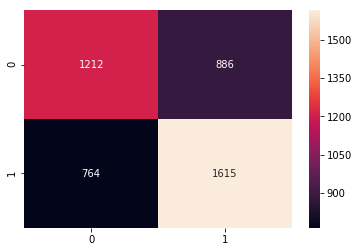

In [89]:
sns.heatmap(cm_final, annot = True, fmt = 'g')

In [90]:
print(classification_report(Y_test, Y_pred_gini))

             precision    recall  f1-score   support

          0       0.61      0.58      0.59      2098
          1       0.65      0.68      0.66      2379

avg / total       0.63      0.63      0.63      4477



In [91]:
accuracy_score(Y_test, Y_pred_gini)

0.6314496314496314

### We almost achive the accuracy of 63.14%